# Machine Learning for Networking - Group Project 5 - DDoS attacks detection and characterization - Section 1
# Preliminaries operations

In [9]:
# import needed python libraries

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
# load dataset
ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")
ddos_data.rename(columns=lambda x: x.strip(), inplace=True)
columns = ddos_data.columns

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
ddos_data['label_bin'] = 1
ddos_data.loc[ddos_data['label'] == 'benign', 'label_b'] = 0

# 1 Investigate the provided dataset

*Discovered features:*
* The Flow ID is the combination of: source IP - destination ip - source port - destination port - protocol
* Some Flow IDs do not respect the rule, why? Error in the dataset or misunderstanding?

***Question***: Is a flow unique or can it be repeated?

In [12]:
ddos_data["Flow ID"].value_counts()

172.16.0.5-192.168.50.1-0-0-0             18
192.168.50.253-224.0.0.5-0-0-0            14
192.168.50.254-224.0.0.5-0-0-0            14
8.0.6.4-8.6.0.1-0-0-0                     12
172.16.0.5-192.168.50.1-9553-22-6          9
                                          ..
172.16.0.5-192.168.50.1-36404-21981-17     1
172.16.0.5-192.168.50.1-36405-46365-17     1
172.16.0.5-192.168.50.1-61850-24027-17     1
172.16.0.5-192.168.50.1-61850-6932-17      1
172.16.0.5-192.168.50.1-45602-1387-17      1
Name: Flow ID, Length: 60958, dtype: int64

***Answer***: No, a flow can appear several times

***Momentary hypothesis***: The flow is given by the grouping of source IP - destination ip - source port - destination port - protocol

In [13]:
ddos_data.groupby(["Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol"]).size().sort_values(
    ascending=False)

Source IP       Source Port  Destination IP  Destination Port  Protocol
172.16.0.5      0            192.168.50.1    0                 0           18
192.168.50.254  0            224.0.0.5       0                 0           14
192.168.50.253  0            224.0.0.5       0                 0           14
8.6.0.1         0            8.0.6.4         0                 0           12
192.168.50.7    50107        52.173.24.17    443               6            9
                                                                           ..
172.16.0.5      900          192.168.50.1    24849             17           1
                                             24863             17           1
                                             24870             17           1
                                             24871             17           1
96.6.27.46      443          192.168.50.8    59154             6            1
Length: 62154, dtype: int64

 **2) Produce different visualizations and statistical analysis both at the generic traffic level
(e.g., number of flows, etc.) and GT level. (e.g., distribution of features, GT class
characterization, ECDF of ports, flows, etc.)**

<AxesSubplot:>

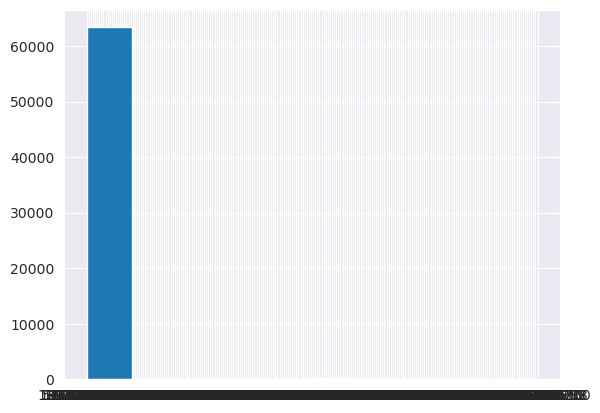

In [14]:
df = ddos_data.loc[:, :]
df["Source IP"].hist()

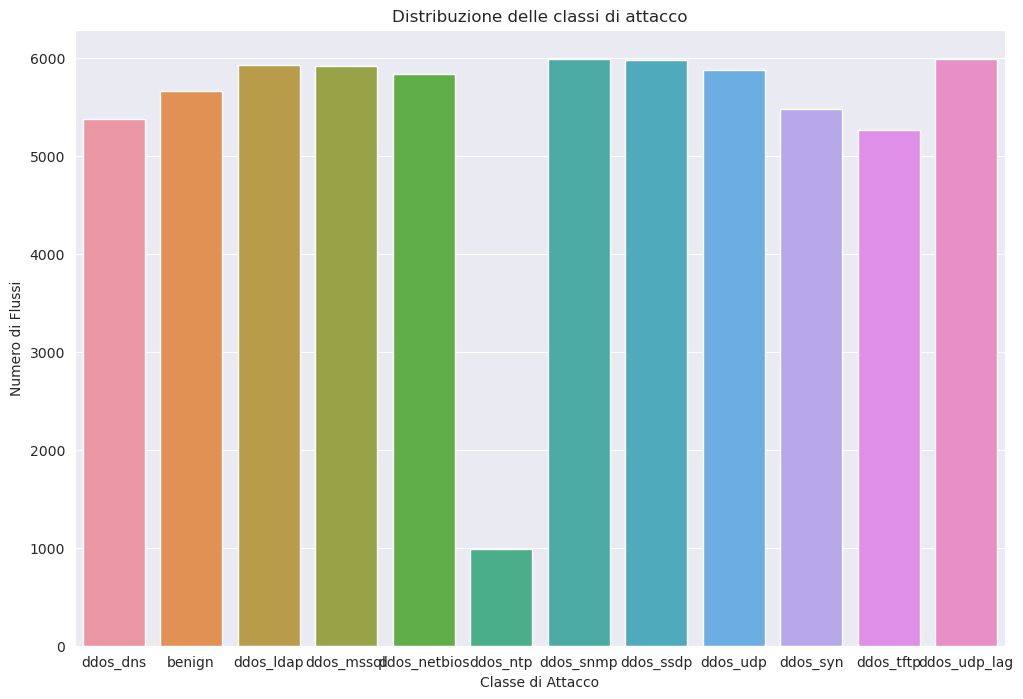

In [15]:
# Visualisation 1: number of flows for each class of attack
plt.figure(figsize=(12, 8))
sns.countplot(x="label", data=df)
plt.title("Distribuzione delle classi di attacco")
plt.xlabel("Classe di Attacco")
plt.ylabel("Numero di Flussi")
plt.show()


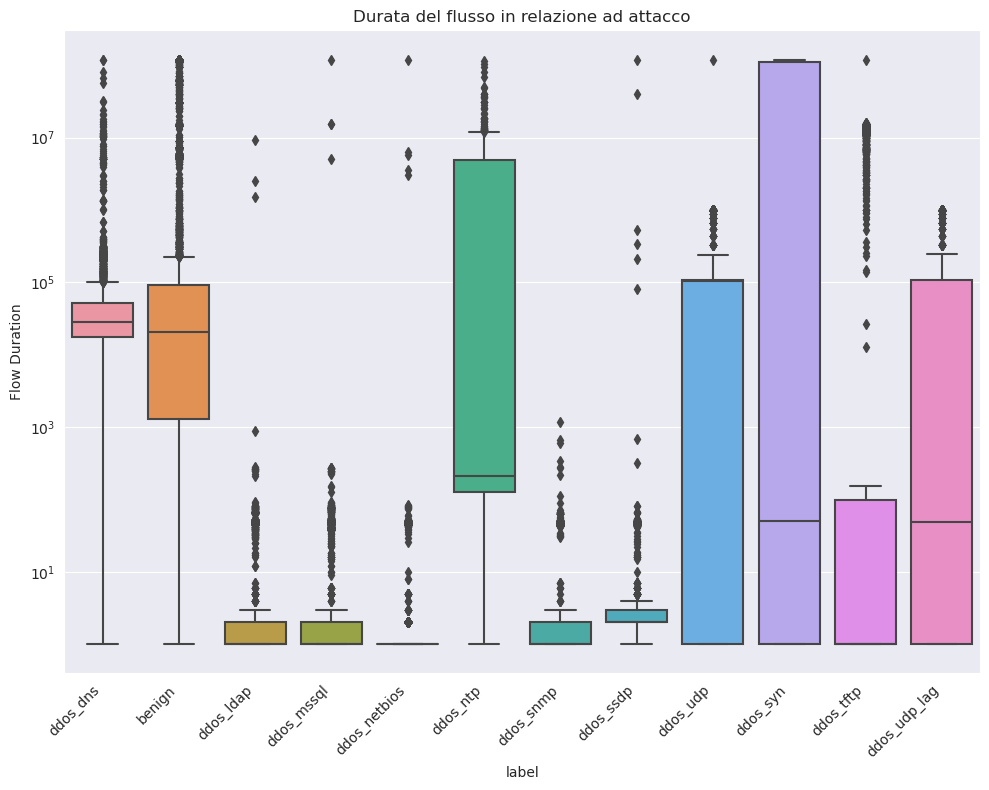

In [16]:
# Flow duration in relation to attack
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df, x='label', y='Flow Duration')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Ruota le etichette
ax.set_yscale('log')  # Imposta la scala logaritmica sull'asse delle y
ax.set_title('Durata del flusso in relazione ad attacco')
plt.tight_layout()  # Assicurati che nulla venga tagliato
plt.show()

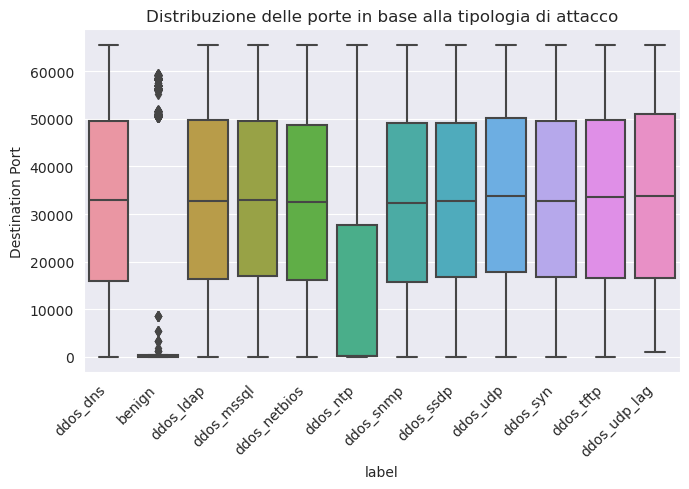

In [17]:
# Distribution of ports according to attack
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Destination Port')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Distribuzione delle porte in base alla tipologia di attacco')
plt.tight_layout()
plt.show()

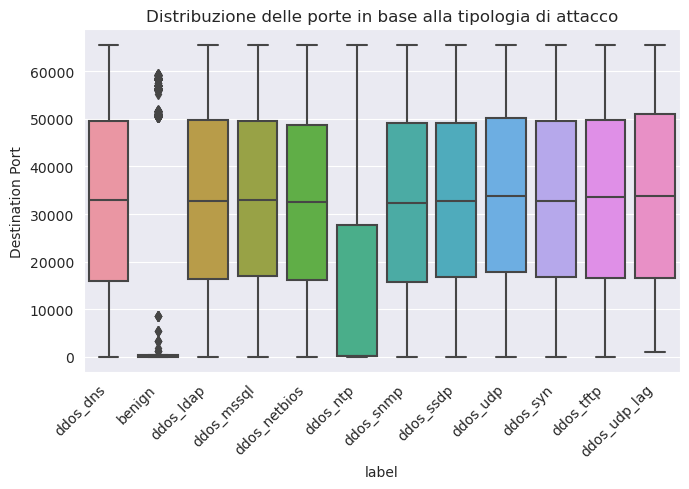

In [18]:
# Packet length according to attack
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Destination Port')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Distribuzione delle porte in base alla tipologia di attacco')
plt.tight_layout()
plt.show()

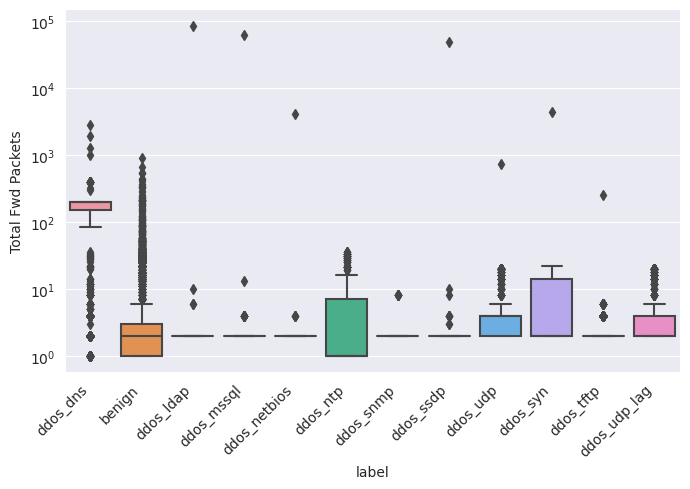

In [19]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Total Fwd Packets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log', base=10)
plt.tight_layout()
plt.show()

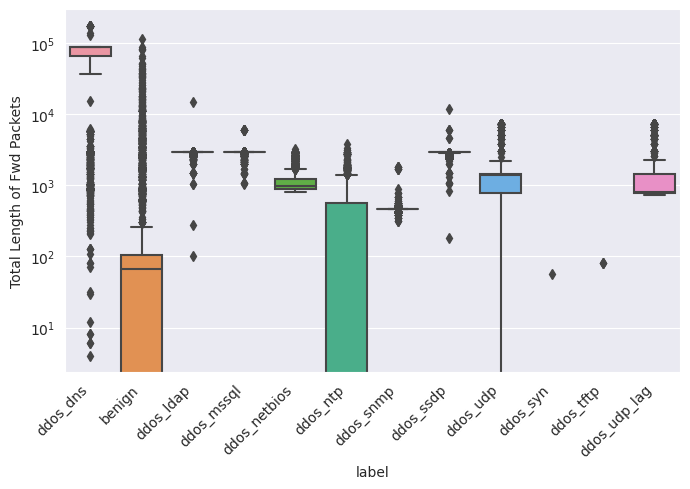

In [20]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Total Length of Fwd Packets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log', base=10)
plt.tight_layout()
plt.show()

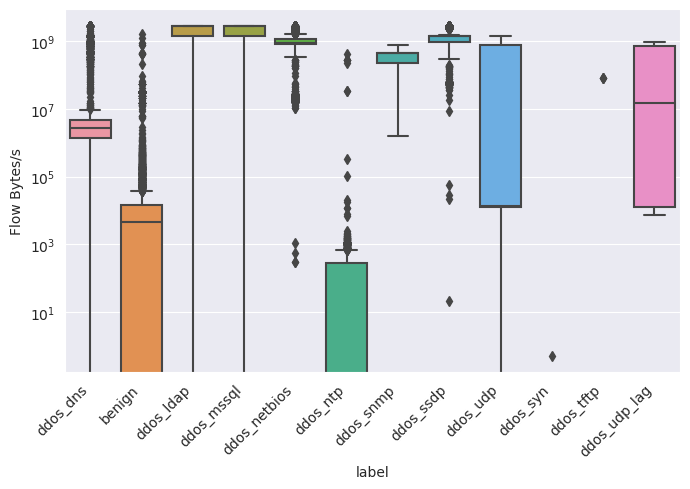

In [21]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Flow Bytes/s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log', base=10)
plt.tight_layout()
plt.show()

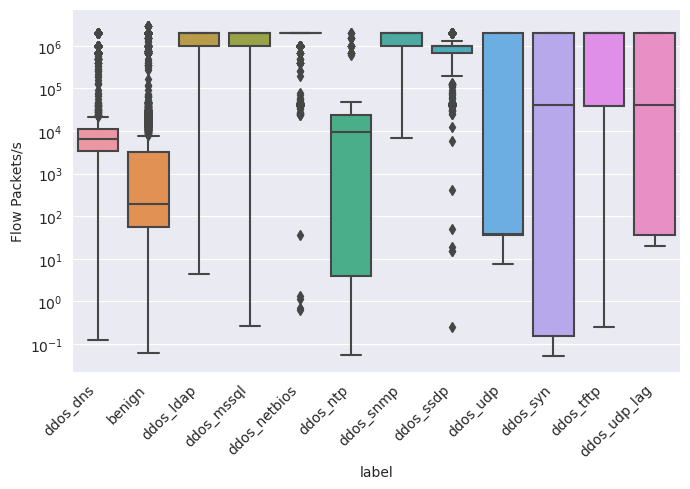

In [22]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Flow Packets/s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log', base=10)
plt.tight_layout()
plt.show()

First conclusions drawn, many features already have mean, deviation, minimum and maximum, we only need to add a few features

In [23]:
ddos_data.groupby(
    ["Source IP", "Source Port", "Destination IP", "Destination Port", "Protocol", "Timestamp"]).size().sort_values(
    ascending=False)

Source IP   Source Port  Destination IP   Destination Port  Protocol  Timestamp                 
0.0.0.0     68           255.255.255.255  67                17        2018-12-01 09:18:30.010736    1
172.16.0.5  44879        192.168.50.1     21570             6         2018-12-01 13:34:27.645918    1
            44864        192.168.50.1     44864             6         2018-12-01 13:30:31.091976    1
            44866        192.168.50.1     14094             6         2018-12-01 13:34:27.643921    1
            44868        192.168.50.1     20616             6         2018-12-01 13:34:27.644029    1
                                                                                                   ..
            900          192.168.50.1     30820             17        2018-12-01 11:22:41.288750    1
                                          30826             17        2018-12-01 11:22:41.596097    1
                                          30831             17        2018-12-01 11:22:

## Correlation Matrix

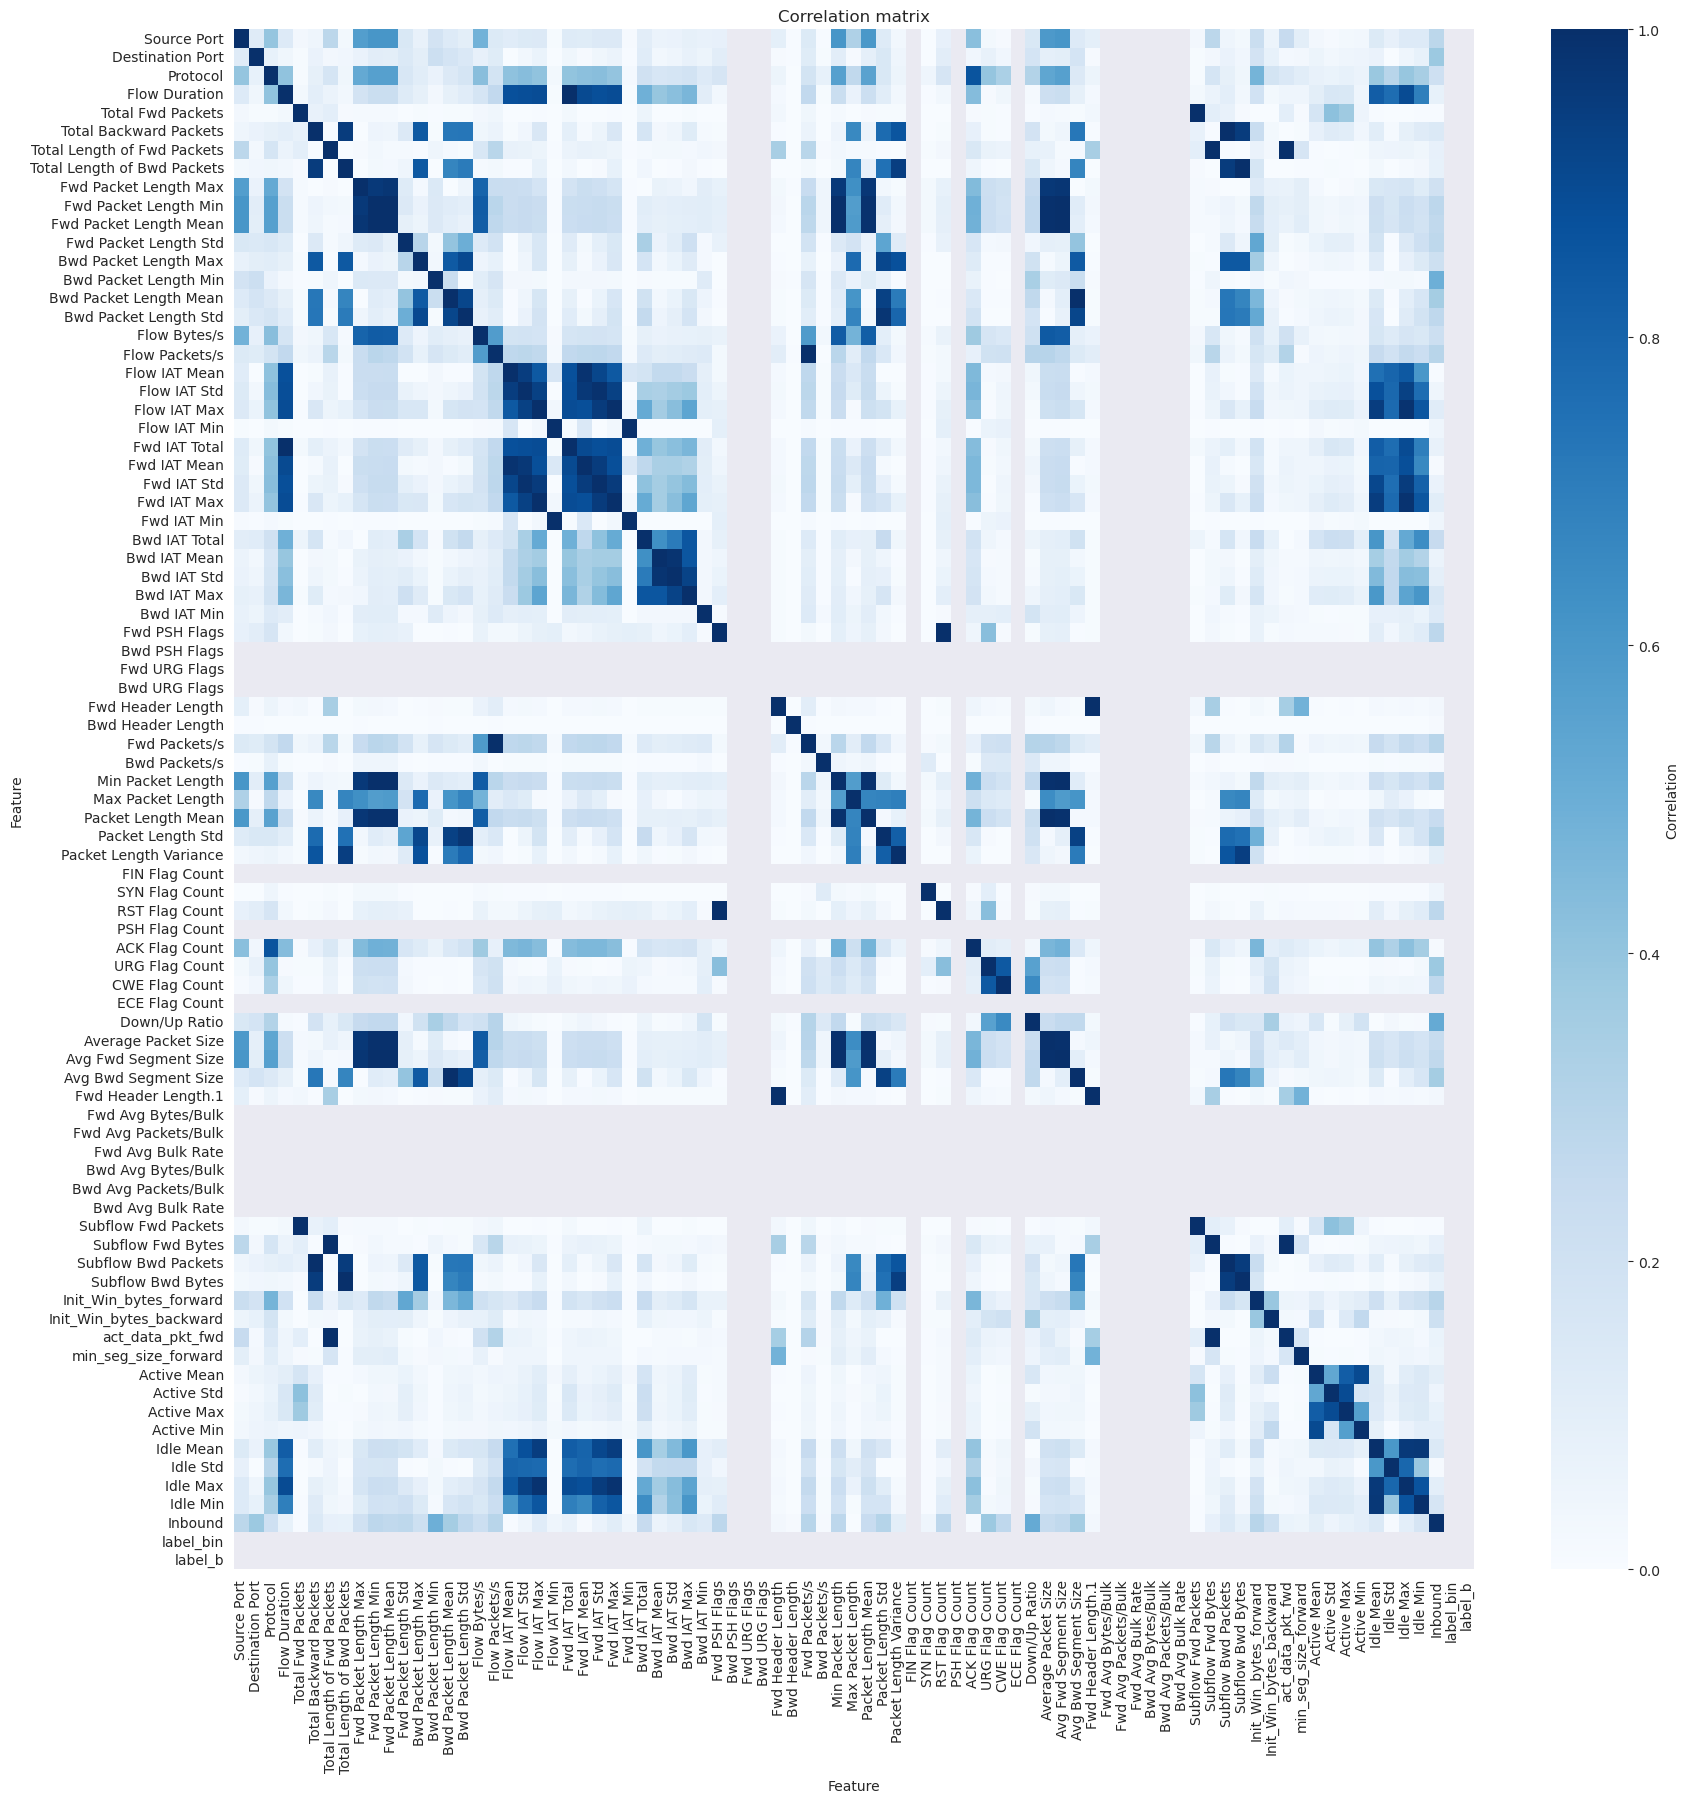

In [24]:
# Objective: to standardise values

ddos_data_copy = ddos_data.copy()
ddos_data_copy.drop(
    columns=["Unnamed: 0", "Flow ID", "Destination IP", "Source IP", "Timestamp", "SimillarHTTP", "label"], axis=1,
    inplace=True)

scaler = StandardScaler()
scaler.fit(ddos_data_copy)
features_tmp = scaler.transform(ddos_data_copy)
ddos_data_s = pd.DataFrame(features_tmp, columns=ddos_data_copy.columns)

correlation_matrix = ddos_data_s.corr().abs()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='Blues', vmin=.0, vmax=1, cbar_kws={'label': 'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

We note that many columns are empty, so let us assume that it is not possible to calculate the correlation and eliminate the features that have zero variance to see if this is the problem

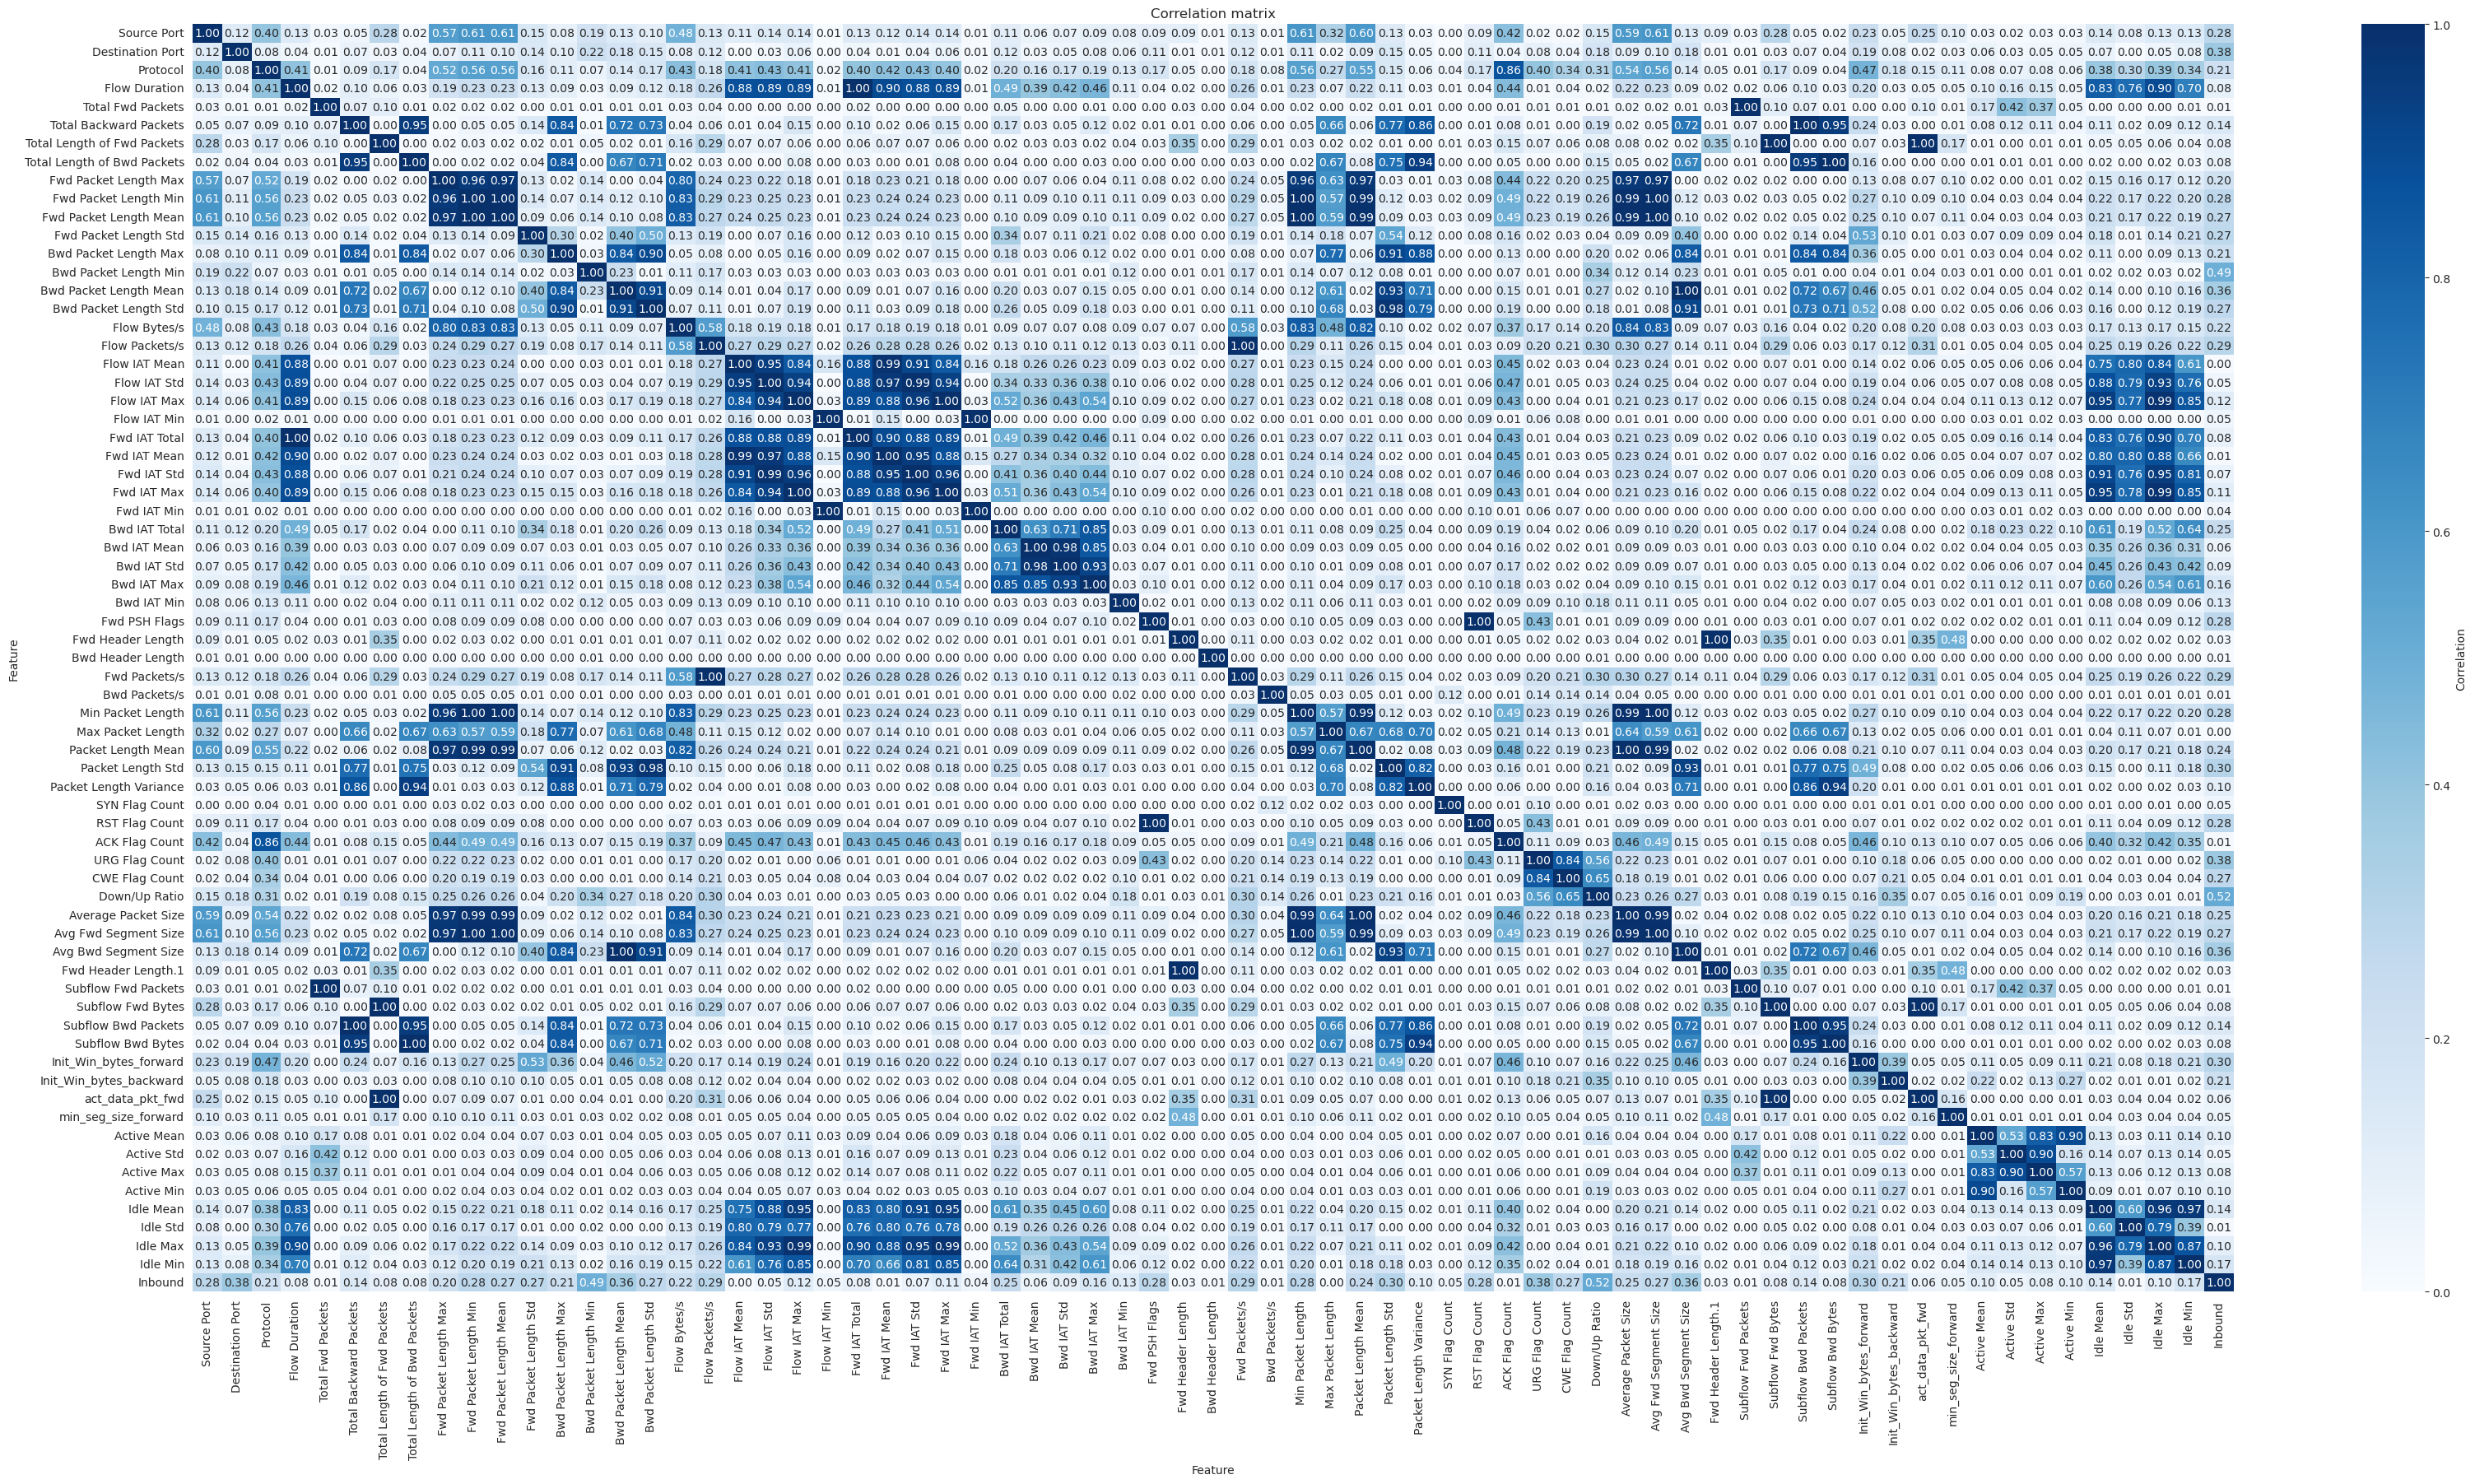

In [25]:
# Variance for each column
variance = ddos_data_s.var()

# Find columns with zero variance
zero_variance = variance[variance == 0].index

# Remove these columns from the DataFrame
ddos_data_s.drop(zero_variance, axis=1, inplace=True)

# Correlation matrix
correlation_matrix = ddos_data_s.corr().abs()

# Compute the heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=.0, vmax=1, cbar_kws={'label': 'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()


In [26]:
# Extract features having a correlation > 0.8
c = correlation_matrix[correlation_matrix > 0.8]
s = c.unstack()
so = s.sort_values(ascending=False).reset_index()

# Get strongly correlatead features, removing pairs having correlation = 1 because of the diagonal, i.e., correlation between one feature and itself
so = so[(so[0].isnull() == False) & (so["level_0"] != so["level_1"])]
to_be_deleted = []
candidates = list(so["level_0"])

# Get the unique set of features to be deleted
# Notice that we discard one feature per time considering the case where a feature is strongly correlated with multiple features
subset_so = so
for candidate in candidates:
    if (candidate in list(subset_so["level_0"])):
        to_be_deleted.append(candidate)  # add the feature to the removed candidates
        subset_so = subset_so[(subset_so["level_0"] != candidate) & (
                    subset_so["level_1"] != candidate)]  # remove the rows that the removed feature is involved

print(len(to_be_deleted), 'features to be removed')
print(sorted(to_be_deleted))

40 features to be removed
['Active Max', 'Active Mean', 'Active Min', 'Average Packet Size', 'Avg Bwd Segment Size', 'Avg Fwd Segment Size', 'Bwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'CWE Flag Count', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Std', 'Fwd Header Length', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Total', 'Fwd PSH Flags', 'Fwd Packet Length Mean', 'Fwd Packet Length Min', 'Fwd Packets/s', 'Idle Max', 'Idle Mean', 'Min Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Protocol', 'Subflow Bwd Bytes', 'Subflow Bwd Packets', 'Subflow Fwd Bytes', 'Subflow Fwd Packets', 'Total Backward Packets', 'Total Length of Bwd Packets', 'Total Length of Fwd Packets']
